<a href="https://colab.research.google.com/github/willshpt/EE475stuff/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import basic librariees and autograd wrapped numpy
import sys
sys.path.append('../')
import autograd.numpy as np
import matplotlib.pyplot as plt

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
#from matplotlib import rcParams
#rcParams['figure.autolayout'] = True

# datapath to data
datapath = '/content/drive/MyDrive/Colab Notebooks/mlrefined_datasets/superlearn_datasets/'

# Exercise 4.5: Newton's Method II

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)

    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        ## TO DO
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        ## TO DO
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))

        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
def thisfunc(w):
  return np.log(1+np.exp(np.dot(w.T,w)))

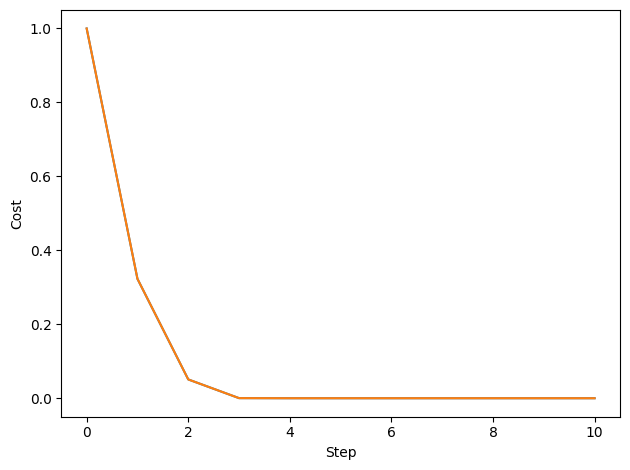

In [ ]:
a,b = newtons_method(thisfunc, 10, np.ones(2))
plt.plot(a)
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show();

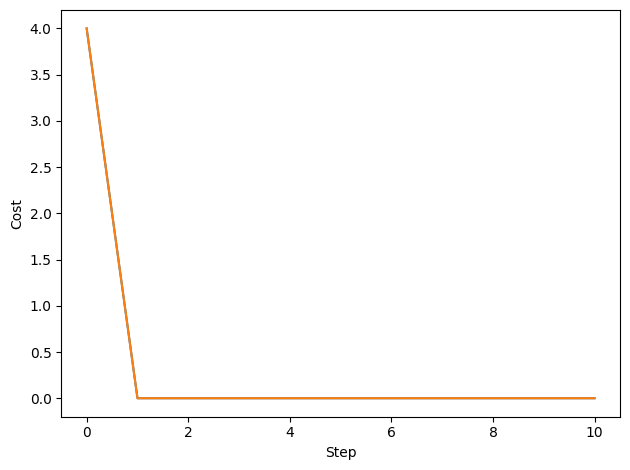

In [ ]:
a,b = newtons_method(thisfunc, 10, 4*np.ones(2))
plt.plot(a)
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show();

# Exercise 5.2. Kleiber’s law and linear regression

In [ ]:
# import the dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
oldx = data[:-1,:]
oldy = data[-1:,:]
x = np.log(oldx)
y = np.log(oldy)
print(np.shape(x))
print(np.shape(y))

(1, 1498)
(1, 1498)


In [ ]:
def model(x,w):
  a = w[0] + np.dot(x.T,w[1:])
  return a.T

In [ ]:
def least_squares(w):
  cost = np.sum((model(x,w) - y)**2)
  return cost/float(y.size)

In [ ]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
from autograd import grad
def new_gradient_descent(g,alpha,max_its,w):
    # cost for this example

    # the gradient function for this example
    gradient = grad(g)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    weight_history = [w]
    for k in range(1,max_its+1):
        # evaluate the gradient, store current weights and cost function value
        ## TO DO
        grad_eval = gradient(w)

        # take gradient descent step
        ## TO DO
        w = w - alpha*grad_eval


        # collect final weights
        cost_history.append(g(w))
        weight_history.append(w)
    return cost_history, weight_history

[6.69682633 0.63001688]


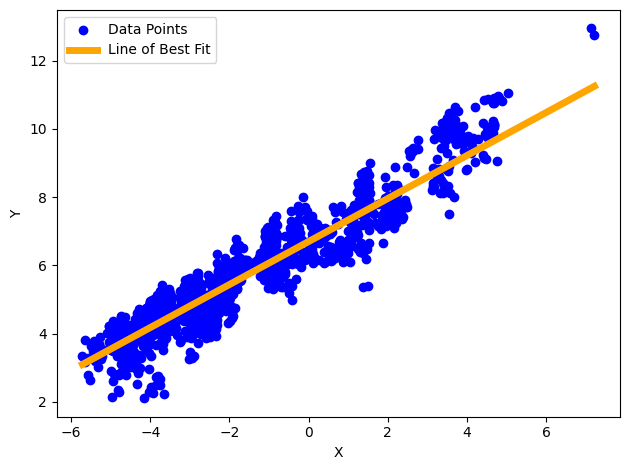

Calories an animal weighing 10kg requires: 
105.52296020129947


In [ ]:
a,b = new_gradient_descent(least_squares,.03,100,np.zeros(2))

final_weights = b[-1]
intercept = final_weights[0]
slope = final_weights[1]
print(final_weights)

x_line = np.linspace(np.min(x), np.max(x), 100)

y_line = slope * x_line + intercept

plt.scatter(x, y, label='Data Points', color='b')

plt.plot(x_line, y_line, label='Line of Best Fit', color='orange', linewidth=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show();
print("Calories an animal weighing 10kg requires: ")
print((np.exp(slope*10+intercept))/(4.18*1000))

# Exercise 5.9. Housing price and Automobile Miles-per-Gallon prediction

In [ ]:
# import the dataset
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
oldx = data[:-1,:]
y = data[-1:,:]
mean = np.nanmean(oldx, axis=0)
std = np.nanstd(oldx, axis=0)
# Standardize the features
x = (oldx - mean) / std
print(np.shape(x))
print(np.shape(y))

(13, 506)
(1, 506)


Mean Absolute Deviation (MAD): 5.998133487538669
Root Mean Square Error (RMSE): 8.46995341819763


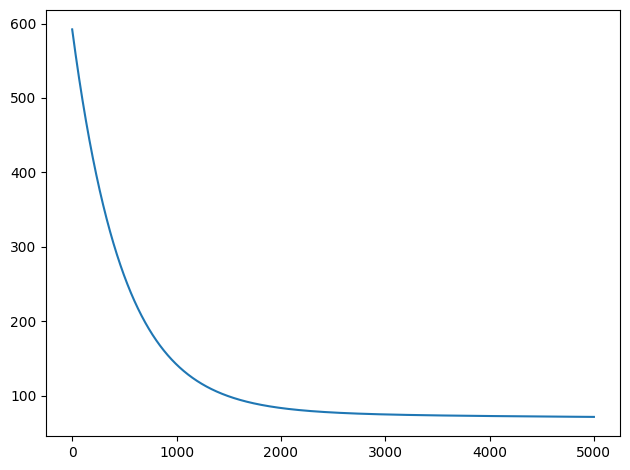

In [ ]:
c,d = new_gradient_descent(least_squares,.00004,5000,np.zeros(x.shape[0] + 1))
final_weights = d[-1]
predictions = model(x, final_weights)
valid_indices = ~np.isnan(predictions) & ~np.isnan(y)
filtered_predictions = predictions[valid_indices[0]]
filtered_y = y[valid_indices]
differences = filtered_y - filtered_predictions
mad = np.nanmean(np.abs(differences))
rmse = np.sqrt(np.nanmean(differences**2))
print("Mean Absolute Deviation (MAD):", mad)
print("Root Mean Square Error (RMSE):", rmse)
plt.plot(c)
plt.show()

In [ ]:
# import the dataset
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
oldx = data[:-1,:]
y = data[-1:,:]

mean = np.nanmean(oldx, axis=0)
std = np.nanstd(oldx, axis=0)
# Standardize the features
x = (oldx - mean) / std
print(np.shape(x))
print(np.shape(y))

(7, 398)
(1, 398)
[[-0.47352499 -0.48013961 -0.47899318 ... -0.46978293 -0.45966945
  -0.45836637]
 [-0.22425743 -0.20920167 -0.21504823 ... -0.30310687 -0.33103298
  -0.33534679]
 [-0.37181716 -0.35576166 -0.35808936 ... -0.36799602 -0.37649932
  -0.37492701]
 ...
 [-0.47019031 -0.47736685 -0.47643887 ... -0.46011317 -0.443479
  -0.44189245]
 [-0.4218374  -0.4310222  -0.42620419 ... -0.37054069 -0.37317251
  -0.37492701]
 [-0.47936069 -0.48568512 -0.48495323 ... -0.47359994 -0.46299626
  -0.46157558]]
[[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
  24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
   9.  27.  28.  25.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.
  12.  13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.
  26.  24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.
  13.  19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.
  27.  13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13. 

Mean Absolute Deviation (MAD): 23.445918367346938
Root Mean Square Error (RMSE): 24.707768546159976


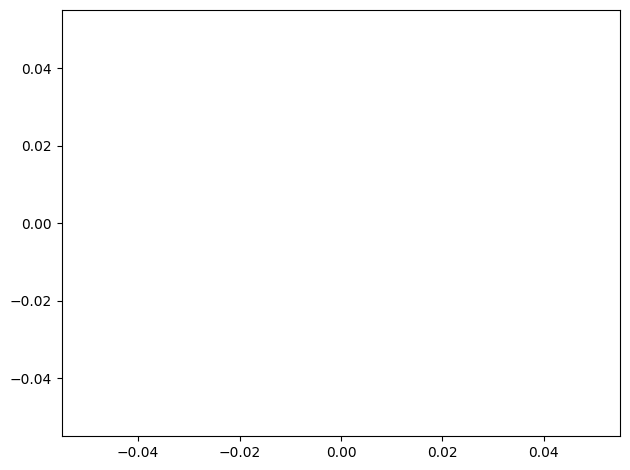

In [ ]:
c,d = new_gradient_descent(least_squares,.000001,0,np.zeros(x.shape[0] + 1))
final_weights = d[-1]
predictions = model(x, final_weights)
valid_indices = ~np.isnan(predictions) & ~np.isnan(y)
filtered_predictions = predictions[valid_indices[0]]
filtered_y = y[valid_indices]
differences = filtered_y - filtered_predictions
mad = np.nanmean(np.abs(differences))
rmse = np.sqrt(np.nanmean(differences**2))
print("Mean Absolute Deviation (MAD):", mad)
print("Root Mean Square Error (RMSE):", rmse)
plt.plot(c)
plt.show()